In [5]:
import pandas as pd
# import os, tempfile
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# from PlottingFunctions import *
# from datetime import datetime
# import time
# import xlrd
# from openpyxl import load_workbook

figure_dir = "../../../Pictures/FigureDump/"

jm_colors_dict = {
    'JM Blue':'#1e22aa',
    'JM Purple':'#e50075',
    'JM Cyan':'#00abe9','JM Green':'#9dd3cb',
    'JM Magenta':'#e3e3e3',
    'JM Light Grey':'#575756',
    'JM Dark Grey':'#6e358b'
}

jm_colors_list = list(jm_colors_dict.values())
cb_colors_list = sns.color_palette("muted")+sns.color_palette("muted")  # deep, muted, pastel, bright, dark, and colorblind
hls_colors_list = sns.color_palette("hls", 8) + sns.color_palette("hls", 8)
tab10_colors_list = sns.color_palette("tab10") + sns.color_palette("tab10")

marker_list = ["o","D","<","v","x","X","8","s","^","p","P","*","h","H","+","d","|","_"]

In [6]:
dir_path = Path("C:/Users/JacksC01/OneDrive - Johnson Matthey/Documents/DigitalModelling/Misc")

file_name = "carolina_table_0_1.csv"
file_full = dir_path / file_name

df = pd.read_csv(file_full)
df["sample_no"] = df.index

df.dtypes
# display(df)

Unnamed: 0      int64
1             float64
2             float64
3             float64
4             float64
5             float64
6             float64
7             float64
8             float64
sample_no       int64
dtype: object

In [31]:
df_clean = df[(df.T != 0).any()] # drop samples that have no signals

# melt dataframe into [sample_no, test, value]
test_cols = ['1', '2', '3', '4', '5', '6', '7', '8']
df_melt = pd.melt(df_clean, id_vars = "sample_no", value_vars = test_cols, var_name = "test")
df_melt['test'] = df_melt[['test','sample_no']].astype(int)
df_melt['test_str'] = df_melt.test.astype(str)

df_plot = df_melt.loc[df_melt.value > 0] # drop rows without signals
df_plot.sort_values(by = ["test", "sample_no"], ascending = True)
display(df_plot)


,sample_no,test,value,test_str
21,22,1,1.0,1
32,33,1,1.0,1
42,43,1,1.0,1
51,52,1,1.0,1
54,55,1,1.0,1
...,...,...,...,...
1128,124,6,1.0,6
1129,125,6,1.0,6
1130,126,6,1.0,6
1131,127,6,1.0,6


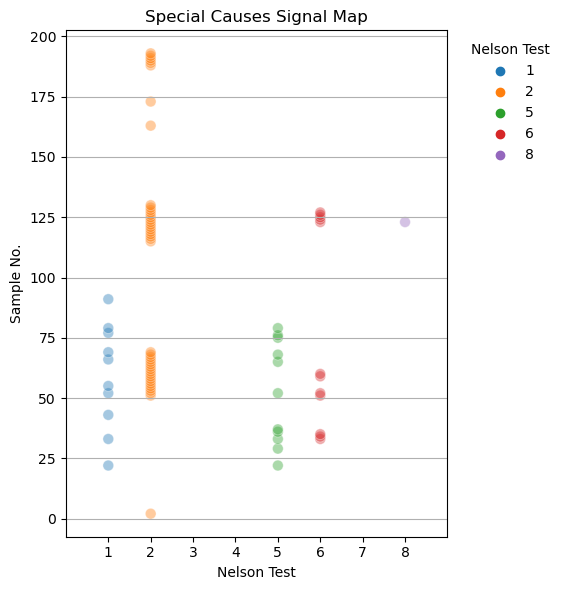

In [32]:
fig, ax = plt.subplots(figsize = (6, 6), dpi = 100)

# sns.stripplot(x = "test", y = "sample_no", hue = "test",
#             data = df_plot, palette = tab10_colors_list,
#             dodge = False, jitter = False,
#             color = "black", s = 7, alpha = 0.4, marker = marker_list[0],
#             orient = "v", ax = ax)

sns.scatterplot(x = "test", y = "sample_no", hue = "test_str", #palette = jm_colors_list,
            data = df_plot, 
            s = 60, alpha = 0.4, marker = marker_list[0],
            ax = ax)

title_var = "Special Causes Signal Map"
image_name = figure_dir + title_var.replace(" ", "") + ".png"

plt.legend(title = "Nelson Test",
           bbox_to_anchor=(1.3, 1), frameon = False)

plt.title(title_var)

ax.set_xticks(range(1,9))
ax.set_xlim(0,9)

ax.set(ylabel = "Sample No.")
ax.set(xlabel = "Nelson Test")
plt.tight_layout()

plt.grid(axis = "y", which = "both")

plt.savefig(image_name, facecolor='w')

plt.show()